## Example of PyTorch convolution

In [1]:
import os 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('./')

['11_pytorch_max_pooling.ipynb',
 '11_mlgeo_pytorch_convolution.ipynb',
 '.ipynb_checkpoints',
 '11_deep_learning_cnn.ipynb']

In [3]:
# data 
transform = transforms.ToTensor()
test_data = datasets.MNIST(root='./data', download=True, train=False, transform=transform)

# data = datasets.EuroSAT(root='./data', download=True, target_transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
test_loader = DataLoader(dataset=test_data , batch_size=10, shuffle=False)
for images, labels in test_loader: 
    break

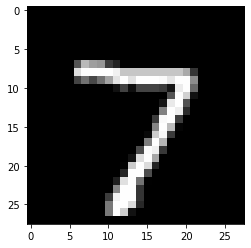

In [7]:
image = images[0]
image.shape
plt.imshow(image.detach().numpy()[0, :, :], cmap='gray')

### Convolution

In [8]:
image.shape

torch.Size([1, 28, 28])

`nn.Conv2d()`

nn.Conv2d(
    in_channels, 
    out_channels, 
    kernel_size, 
    stride, 
    padding, 
    device=None
)

* `in_channels` number of input channels 

* `out_channels` number of outpu channels 

* `kernel_size` size of the convolution kernel 

* `stride` controls the stride of the kernel 

* `padding` controls the amount of padding pixels  applied to the input
  
* `device` either CPU or GPU 


In [27]:
conv = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1, padding=1)

In [28]:
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [29]:
image_conv = conv(image)

In [30]:
image_conv.shape

torch.Size([1, 28, 28])

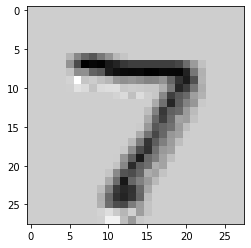

In [31]:
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

In [32]:
conv.weight.size()

torch.Size([1, 1, 3, 3])

In [34]:
conv.weight = nn.Parameter(torch.ones((1, 1, 3, 3)))
conv.weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True)

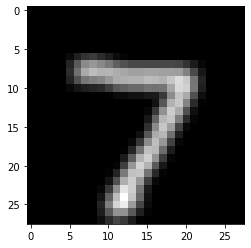

In [35]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

In [36]:
conv.weight = nn.Parameter(torch.zeros((1, 1, 3, 3)))
conv.weight

Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], requires_grad=True)

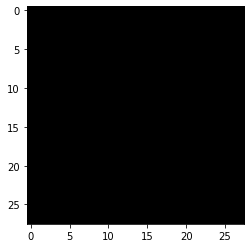

In [37]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

#### High pass filter 
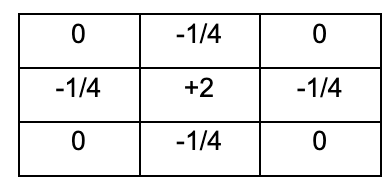

In [38]:
hp = [
      [  0.0, -0.25, 0.0 ], 
      [-0.25,  2.0, -0.25], 
      [  0.0, -0.25, 0.0 ]
     ]

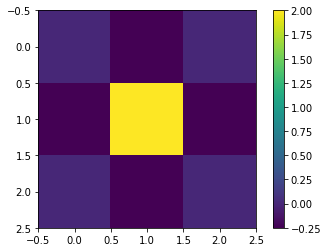

In [39]:
plt.imshow(hp)
plt.colorbar()

In [40]:
hp_torch = torch.FloatTensor(hp)

In [41]:
hp_torch

tensor([[ 0.0000, -0.2500,  0.0000],
        [-0.2500,  2.0000, -0.2500],
        [ 0.0000, -0.2500,  0.0000]])

In [42]:
conv.weight = nn.Parameter(torch.reshape(hp_torch, (1, 1, 3, 3)))
conv.weight

Parameter containing:
tensor([[[[ 0.0000, -0.2500,  0.0000],
          [-0.2500,  2.0000, -0.2500],
          [ 0.0000, -0.2500,  0.0000]]]], requires_grad=True)

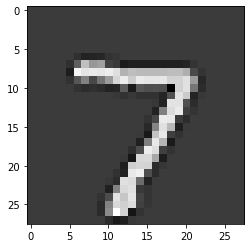

In [43]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

### Question: 
If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1,  and no padding, what is the resulting matrix size?
